OPTIMIZACION DE LA GESTION DE RESIDUOS EN UNA PLANTA INDUSTRIAL MEDIANTE EL MODELAMIENTO AMBIENTAL EN PYTHON

PLANTEAMIENTO DEL PROBLEMA

Actualmente, la gestión de residuos sólidos en la empresa la cual presenta desafíos relacionados con la categorización, cuantificación y optimización de su manejo. No existe un modelo automatizado que permita predecir tendencias en la generación de residuos, evaluar la eficiencia en su disposición o sugerir estrategias para mejorar la tasa de reciclaje y minimizar costos.

OBJETIVO GENERAL

Desarrollar un modelo basado en Python que analice y optimice la gestión de residuos sólidos en la empresa industrial, proporcionando información útil para la toma de decisiones en términos de reducción, reciclaje y cumplimiento normativo.

OBJETIVOS ESPECIFICOS
1. Analizar la distribución de los residuos generados por tipo (peligroso y no peligroso) y sede.

2. Desarrollar modelos predictivos para estimar la generación futura de residuos y tendencias estacionales.

3. Optimizar la gestión de residuos considerando métricas como tasa de desviación y reciclabilidad.

4. Automatizar reportes sobre la generación de residuos y su impacto ambiental.

METODOLOGIA

El proyecto se dividirá en las siguientes fases:

1. Exploración y Limpieza de Datos

    Carga de la base de datos en Python (usando Pandas).
    Manejo de valores nulos o inconsistentes.
    Conversión de formatos de fechas y unidades.
    Exploración de datos para obtener insights iniciales.

2. Análisis Exploratorio

    Análisis de tendencias anuales y estacionales en la generación de residuos.
    Identificación de patrones en las diferentes sedes y tipos de residuos.
    Visualización de datos con gráficos en Matplotlib y Seaborn.

3. Modelado Predictivo

    Aplicación de modelos de series temporales (ARIMA, Prophet o modelos de regresión) para predecir la generación de residuos.
    Evaluación de los modelos y selección del más preciso.

4. Optimización de Gestión de Residuos
    
    Cálculo de residuos generados: Calcular residuos peligrosos y no peligrosos generados.
    Tasa de desviación de residuos: Analizar residuos no peligrosos desviados o gestionados de forma diferente.
    Estrategias de reducción: Buscar formas de reducir residuos peligrosos y optimizar la disposición final en el relleno 

5. Implementación y Simulación

   Crear un script para calcular la generación de residuos y simular escenarios de reducción de residuos peligrosos.
   
6. Documentación y Entregables

    Documentar los pasos y generar reportes sobre las estrategias para mejorar la gestión de residuos..
    
HERRAMIENTAS Y TECNOLOGIAS
    Python (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Statsmodels, Prophet)
    Jupyter Notebook para desarrollo
    Excel (Fuente de datos)


1.LIMPIEZA DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo Excel
df = pd.read_excel("residuos.xlsx")
 # Mostrar las primeras filas para revisar la estructura inicial
display(df.head())
display(df.info())



,Fecha de servicio,Tipo de Residuo,DESCRIPCIÓN DE ARTICULO,CANTIDAD,UM,Local,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16349,Unnamed: 16350,Unnamed: 16351,Unnamed: 16352,Unnamed: 16353,Unnamed: 16354,Unnamed: 16355,Unnamed: 16356,Unnamed: 16357,Unnamed: 16358
0,2007-04-11,PELIGROSO,FLUORESCENTES USADOS,0.240,TM,SANTA ANITA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2008-12-18,PELIGROSO,BATERÍAS EN DESUSO,0.180,TM,SANTA ANITA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,2008-12-18,PELIGROSO,ACEITE LUBRICANTE USADO,0.164,TM,SANTA ANITA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,2009-12-14,PELIGROSO,ACEITE LUBRICANTE USADO,0.694,TM,SANTA ANITA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,2010-12-01,PELIGROSO,ACEITE LUBRICANTE USADO,2.448,TM,SANTA ANITA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Columns: 16359 entries, Fecha de servicio to Unnamed: 16358
dtypes: datetime64[ns](2), float64(16353), object(4)
memory usage: 124.4+ MB


None

In [2]:
# Renombrare las columnas para poder trabajar mejor
df.rename(columns={
    "Fecha de servicio": "fecha_servicio",
    "Tipo de Residuo": "tipo_residuo",
    "DESCRIPCIÓN DE ARTICULO": "nombre_residuo",
    "CANTIDAD": "cantidad_tn",
    "Local": "sede"
}, inplace=True)

# Eliminar columnas cuyo nombre contenga 'Unnamed' o que tengan valores nulos (o 'nat')
df = df.loc[:, ~df.columns.str.contains('^Unnamed') & (df.isnull().sum() != df.shape[0])]
df.head()


,fecha_servicio,tipo_residuo,nombre_residuo,cantidad_tn,UM,sede
0,2007-04-11,PELIGROSO,FLUORESCENTES USADOS,0.240,TM,SANTA ANITA
1,2008-12-18,PELIGROSO,BATERÍAS EN DESUSO,0.180,TM,SANTA ANITA
2,2008-12-18,PELIGROSO,ACEITE LUBRICANTE USADO,0.164,TM,SANTA ANITA
3,2009-12-14,PELIGROSO,ACEITE LUBRICANTE USADO,0.694,TM,SANTA ANITA
4,2010-12-01,PELIGROSO,ACEITE LUBRICANTE USADO,2.448,TM,SANTA ANITA


In [3]:
# Eliminar la columna 'UM' ya que ya indique que la cantidad de los residuos estan en toneladas
df = df.drop(columns=['UM'])
df.head()

,fecha_servicio,tipo_residuo,nombre_residuo,cantidad_tn,sede
0,2007-04-11,PELIGROSO,FLUORESCENTES USADOS,0.240,SANTA ANITA
1,2008-12-18,PELIGROSO,BATERÍAS EN DESUSO,0.180,SANTA ANITA
2,2008-12-18,PELIGROSO,ACEITE LUBRICANTE USADO,0.164,SANTA ANITA
3,2009-12-14,PELIGROSO,ACEITE LUBRICANTE USADO,0.694,SANTA ANITA
4,2010-12-01,PELIGROSO,ACEITE LUBRICANTE USADO,2.448,SANTA ANITA


In [4]:
# Convertir la columna de fecha al formato adecuado
df["fecha_servicio"] = pd.to_datetime(df["fecha_servicio"], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997 entries, 0 to 996
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha_servicio  997 non-null    datetime64[ns]
 1   tipo_residuo    997 non-null    object        
 2   nombre_residuo  997 non-null    object        
 3   cantidad_tn     997 non-null    float64       
 4   sede            997 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 39.1+ KB


In [5]:
# Estandarizar los nombres de las sedes
df["sede"] = df["sede"].str.strip().str.lower()
df["sede"] = df["sede"].replace({
    "lurín": "Lurin", 
    "santa anita": "Santa Anita", 
    "aragón": "Aragon"})
# Asegurar que la cantidad sea numérica
df["cantidad_tn"] = pd.to_numeric(df["cantidad_tn"], errors='coerce')
# Eliminar posibles duplicados
df = df.drop_duplicates()
# Revisar los cambios realizados
display(df.head())

,fecha_servicio,tipo_residuo,nombre_residuo,cantidad_tn,sede
0,2007-04-11,PELIGROSO,FLUORESCENTES USADOS,0.240,Santa Anita
1,2008-12-18,PELIGROSO,BATERÍAS EN DESUSO,0.180,Santa Anita
2,2008-12-18,PELIGROSO,ACEITE LUBRICANTE USADO,0.164,Santa Anita
3,2009-12-14,PELIGROSO,ACEITE LUBRICANTE USADO,0.694,Santa Anita
4,2010-12-01,PELIGROSO,ACEITE LUBRICANTE USADO,2.448,Santa Anita


2.ANALISIS EXPLORATORIO

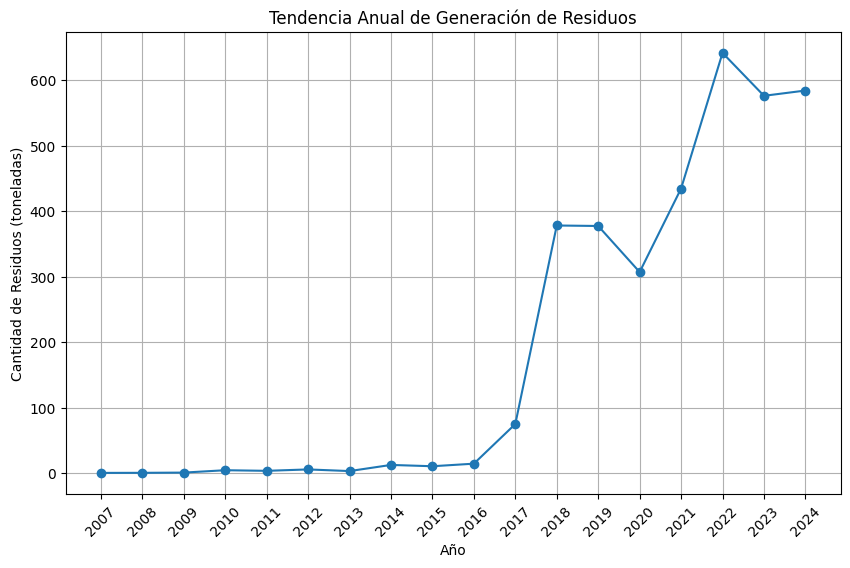

<Figure size 1200x800 with 0 Axes>

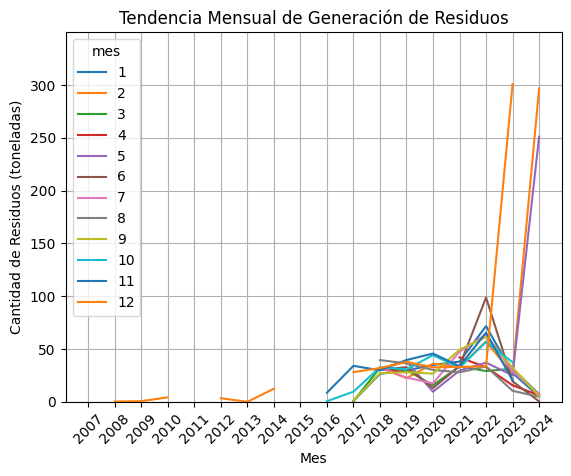

In [6]:
# Convertir la fecha a formato datetime si es necesario
df['fecha_servicio'] = pd.to_datetime(df['fecha_servicio'])

# Agrupar los datos por año y mes para ver las tendencias anuales
df['año'] = df['fecha_servicio'].dt.year
df['mes'] = df['fecha_servicio'].dt.month

# Sumar la cantidad de residuos por año y mes
tendencias_anuales = df.groupby('año')['cantidad_tn'].sum()
tendencias_mensuales = df.groupby(['año', 'mes'])['cantidad_tn'].sum().unstack()

# Visualización de tendencias anuales
plt.figure(figsize=(10, 6))
plt.plot(tendencias_anuales.index, tendencias_anuales.values, marker='o')

# Formatear el eje x para que muestre los años correctamente
plt.title('Tendencia Anual de Generación de Residuos')
plt.xlabel('Año')
plt.ylabel('Cantidad de Residuos (toneladas)')
plt.xticks(tendencias_anuales.index, rotation=45)  # Rotar etiquetas del eje x si es necesario
plt.grid(True)
plt.show()

# Visualización de tendencias mensuales
plt.figure(figsize=(12, 8))
tendencias_mensuales.plot(kind='line')

# Personalizar el título y las etiquetas
plt.title('Tendencia Mensual de Generación de Residuos')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Residuos (toneladas)')

# Establecer los límites y ticks del eje Y desde 0 hasta 350 con un paso de 50
plt.ylim(0, 350)  # Limitar el rango del eje Y
plt.yticks(np.arange(0, 350, 50))  # Escala de 0 a 350 con paso de 50

# Personalizar el eje X para que muestre solo los años
plt.xticks(np.arange(2007, 2025, 1))  # De 2007 a 2024, de 1 en 1

# Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=45)

plt.grid(True)
plt.show()


TENDENCIA ANUAL DE GENERACION DE RESIDUOS

Pre-2018:
Generación de residuos baja y estable.
Control de residuos laxo.
Post-2018:
Aumento drástico en la generación.
Mayor fiscalización y sanciones.
Posible aumento real en la producción.
Implicación:
Cambio marcado en la gestión de residuos.
Efecto combinado de fiscalización y producción.

TENDENCIA MENSUAL DE GENERACIOND DE RESIDUOS

Aumento: La generación de residuos ha aumentado significativamente, especialmente en los últimos años (2023 y 2024).
Variabilidad: Hay una gran variabilidad mensual en la generación de residuos.
Picos: Los meses 1 (enero) y 12 (diciembre) a menudo muestran picos de generación.
Implicación: Se necesita una mejor gestión de residuos.

3. MODELO PREDICTIVO

Paso 1: Instalar las bibliotecas necesarias
Instala statsmodels usando pip para poder usar el modelo Holt-Winters.

Verifica que la instalación se haya realizado correctamente antes de continuar

In [7]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 84.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 36.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 60.2 MB/s eta 0:00:00


Paso 2: Preparar los datos
Convierte las fechas a formato datetime para manejarlas como series temporales.

Agrupa los datos por mes y suma las cantidades de residuos generados en cada mes.

Convierte las fechas de los grupos mensuales a un formato de timestamp para asegurar que sean adecuadas para el modelo.

In [8]:
# Asegúrate de tener los datos en formato correcto
df['fecha_servicio'] = pd.to_datetime(df['fecha_servicio'])

# Agrupar por mes y sumar la cantidad de residuos generados
df_mensual = df.groupby(df['fecha_servicio'].dt.to_period('M')).sum().reset_index()
df_mensual['fecha_servicio'] = df_mensual['fecha_servicio'].dt.to_timestamp()

# Mostrar las primeras filas para verificar los datos
df_mensual.head()

,fecha_servicio,cantidad_tn,año,mes
0,2007-04-01,0.240,2007,4
1,2008-12-01,0.344,4016,24
2,2009-12-01,0.694,2009,12
3,2010-12-01,4.328,4020,24
4,2011-10-01,3.397,4022,20


In [ ]:
Paso 3: Entrenar el modelo Holt-Winters
Inicializa y ajusta el modelo Holt-Winters con las configuraciones adecuadas (tendencia y estacionalidad).

Ajusta el modelo utilizando los datos mensuales de residuos.

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Ajustar el modelo Holt-Winters
modelo_hw = ExponentialSmoothing(df_mensual['cantidad_tn'], 
                                 trend='add', 
                                 seasonal='add', 
                                 seasonal_periods=12)  # Estacionalidad mensual (12 períodos)
modelo_hw_fitted = modelo_hw.fit()

# Ver el resumen del modelo ajustado
print(modelo_hw_fitted.summary())


                       ExponentialSmoothing Model Results                       
Dep. Variable:              cantidad_tn   No. Observations:                  106
Model:             ExponentialSmoothing   SSE                         183477.336
Optimized:                         True   AIC                            822.379
Trend:                         Additive   BIC                            864.994
Seasonal:                      Additive   AICC                           830.241
Seasonal Periods:                    12   Date:                 Thu, 03 Apr 2025
Box-Cox:                          False   Time:                         03:01:43
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0382897                alpha                 True
smoothing_trend          

Paso 4: Generar las predicciones
Usa el modelo ajustado para generar predicciones para los próximos 12 meses.

Crea un DataFrame con las fechas futuras y las predicciones generadas.

In [10]:
# Generar predicciones para los próximos 12 meses
predicciones_hw = modelo_hw_fitted.forecast(steps=12)

# Crear un DataFrame con las predicciones y las fechas correspondientes
fechas_futuras = pd.date_range(df_mensual['fecha_servicio'].max(), periods=13, freq='M')[1:]
predicciones_df = pd.DataFrame({'fecha_servicio': fechas_futuras, 'prediccion': predicciones_hw})

# Ver las predicciones
print(predicciones_df)


    fecha_servicio  prediccion
106     2024-10-31   60.994474
107     2024-11-30   64.473430
108     2024-12-31   93.042128
109     2025-01-31   63.221742
110     2025-02-28   92.808105
111     2025-03-31   58.407887
112     2025-04-30   56.520120
113     2025-05-31   82.668753
114     2025-06-30   62.538321
115     2025-07-31   63.071205
116     2025-08-31   54.549693
117     2025-09-30   64.698694


Paso 5: Visualizar los resultados
Grafica tanto los datos históricos como las predicciones para comparar los resultados.

Personaliza el gráfico para mejorar la visualización y hacer que las predicciones sean fácilmente identificables.

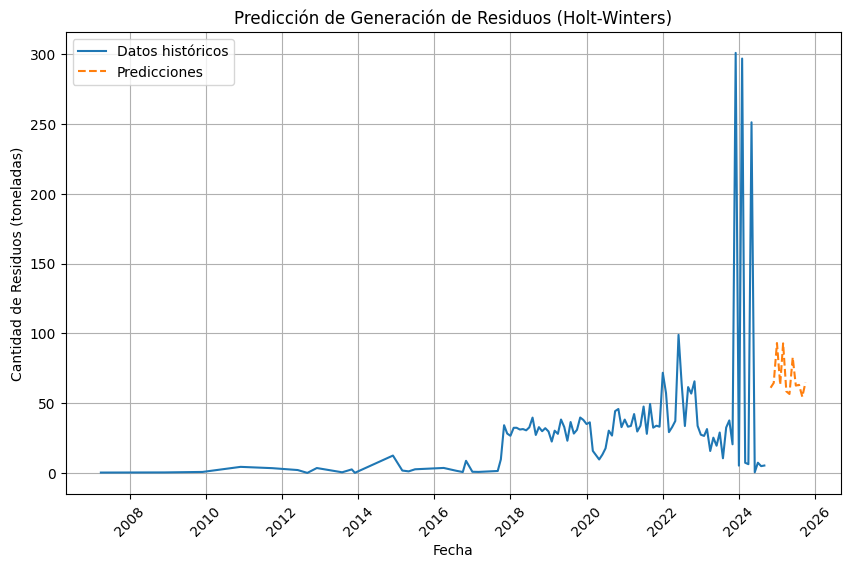

In [11]:
# Graficar los resultados
plt.figure(figsize=(10, 6))

# Graficar los datos históricos
plt.plot(df_mensual['fecha_servicio'], df_mensual['cantidad_tn'], label='Datos históricos')

# Graficar las predicciones
plt.plot(predicciones_df['fecha_servicio'], predicciones_df['prediccion'], label='Predicciones', linestyle='--')

# Personalizar el gráfico
plt.title("Predicción de Generación de Residuos (Holt-Winters)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Residuos (toneladas)")
plt.legend()
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.show()

INTERPRETACION DE LS DATOS OBTENIDOS CON EL MODELO
Contexto normativo y su impacto

Aunque los datos de generación de residuos están disponibles desde 2007, un cambio importante ocurrió en 2018, cuando la legislación ambiental en Perú se volvió más estricta en cuanto a la gestión de residuos.

Esto significa que, antes de 2018, la empresa probablemente no tenía una gestión rigurosa ni reportaba con precisión la generación de residuos.

Desde 2019, con la creación del área de medio ambiente, se pudo haber mejorado el registro y control de los residuos, lo que explicaría un aumento más notorio en los datos a partir de ese año.

RELACION ENTRE PRODUCCION Y GENERACION DE RESIDUOS

El incremento en la producción de la empresa ha influido directamente en la cantidad de residuos generados.

La tendencia al alza en la generación de residuos en los últimos años puede estar reflejando tanto un crecimiento en la producción como una mejor capacidad de medición y reporte debido a la existencia del área ambiental.

Interpretación de los picos recientes (2023-2024)

Los picos extremos en la generación de residuos en 2023 y 2024 pueden estar asociados a eventos específicos, como aumentos abruptos en la producción, cambios en la normativa o implementación de nuevas prácticas de gestión de residuos.

Es importante analizar si estos valores representan situaciones atípicas o si reflejan una nueva tendencia.

PREDICCIONES Y PROYECCIONES FUTURAS

El modelo Holt-Winters está prediciendo fluctuaciones para los próximos meses, lo que puede estar reflejando la variabilidad en la producción y la gestión de residuos.

Sin embargo, dado que la legislación se ha vuelto más estricta y la producción sigue en aumento, podría ser útil complementar este modelo con otro que incorpore variables externas como producción mensual y cambios en la normativa.

Recomendaciones para mejorar la interpretación y la predicción
Incluir datos de producción en el análisis para ver exactamente cómo influye en la generación de residuos.

Analizar los efectos de la normativa antes y después de 2018 para determinar si los cambios en la cantidad de residuos reflejan cumplimiento legal o simplemente un mejor registro.

Revisar los picos atípicos de 2023-2024 para entender si son eventos únicos o si representan un patrón recurrente.

OPTIMIZACION DE GESTION DE RESIDUOS 

CALCULO DE RESIDUOS GENERADOS
El primer paso es calcular la cantidad de residuos peligrosos y no peligrosos generados. En tu base de datos, ya tienes una columna que indica el tipo de residuo (peligroso o no peligroso). Puedes agrupar los residuos por tipo y calcular la cantidad total generada para cada uno.

In [36]:
# Agrupar por tipo de residuo y sumar la cantidad de residuos generados
df_residuos_generados = df.groupby('tipo_residuo')['cantidad_tn'].sum().reset_index()

# Mostrar resultados
print(df_residuos_generados)


   tipo_residuo  cantidad_tn
0  NO PELIGROSO   2049.94358
1     PELIGROSO   1380.95560


TASA DE DESVIACION DE RESIDUOS La tasa de desviación de residuos mide la cantidad de residuos no peligrosos que se gestionan de manera diferente (por ejemplo, reciclaje, reutilización o disposición especial) frente a los residuos que van directamente al relleno sanitario.

Supuesto: Si no tienes un dato directo de los residuos reciclados, puedes asumir que los residuos no peligrosos podrían ser gestionados de manera diferente, mientras que los residuos peligrosos van al relleno.

In [38]:
# Eliminar espacios y normalizar las categorías de residuos
df['tipo_residuo'] = df['tipo_residuo'].str.strip().str.upper()

# Calcular residuos no peligrosos y peligrosos
total_no_peligrosos = df[df['tipo_residuo'] == 'NO PELIGROSO']['cantidad_tn'].sum()
total_peligrosos = df[df['tipo_residuo'] == 'PELIGROSO']['cantidad_tn'].sum()

# Verifica si alguno es cero
if total_no_peligrosos == 0 and total_peligrosos == 0:
    print("No hay residuos registrados para este cálculo.")
else:
    # Tasa de desviación (no peligrosa desviada o gestionada diferente)
    if total_no_peligrosos + total_peligrosos > 0:
        tasa_desviacion = total_no_peligrosos / (total_no_peligrosos + total_peligrosos)
        print(f'Tasa de desviación de residuos no peligrosos: {tasa_desviacion * 100:.2f}%')
    else:
        print("No se puede calcular la tasa de desviación debido a la falta de datos.")


Tasa de desviación de residuos no peligrosos: 59.75%


ESTRATEGIAS DE REDUCCION

Reducción en la fuente:

    Optimizar procesos de producción para reducir desperdicios.
    Diseñar productos más sostenibles y con menor generación de residuos.
    Mejorar la eficiencia en el uso de materias primas.

Reutilización y valorización:

    Investigar opciones para reutilizar algunos residuos no peligrosos dentro del proceso.
    Valorizar residuos peligrosos (baterías, aceites, RAEE) a través de tratamientos especializados.

Optimización de la disposición final:

    Mejorar la segregación de residuos en planta para asegurar una correcta gestión.
    Implementar tecnologías de tratamiento controlado para residuos peligrosos.

Gestión externa de residuos:

    Colaborar con empresas especializadas en la gestión y tratamiento de residuos peligrosos.
    Implementar políticas de responsabilidad extendida del productor para ciertos residuos.

Este enfoque te permitirá reducir la cantidad de residuos generados, mejorar la gestión de residuos peligrosos y optimizar la disposición final en el relleno sanitario.

ANALISIS FINAL 

Conclusiones:
Generación de residuos: La planta genera tanto residuos peligrosos como no peligrosos. Los residuos no peligrosos tienen una tasa de desviación del 59.75%, lo que indica que una parte significativa es gestionada de manera especial.

Gestión de residuos peligrosos: No es posible reciclar los residuos peligrosos, pero es crucial optimizar su disposición final para reducir el impacto ambiental.

Posibles mejoras: A pesar de la tasa de desviación positiva, hay oportunidades para mejorar la segregación y la reutilización de residuos no peligrosos, así como explorar tecnologías para tratar residuos peligrosos.

Sugerencias:
Mejorar la segregación de residuos: Implementar procesos más eficaces para separar residuos peligrosos y no peligrosos en la planta.

Fomentar reciclaje y reutilización: Promover el reciclaje de residuos no peligrosos y buscar maneras de reutilizar materiales en la planta.

Tecnologías de tratamiento para residuos peligrosos: Explorar tecnologías que permitan tratar los residuos peligrosos antes de enviarlos al relleno sanitario.

Monitoreo y capacitación: Establecer un sistema de monitoreo continuo y capacitar al personal para mejorar la gestión de residuos.

Datos clave:
    
Tasa de desviación de residuos no peligrosos: 59.75%.

Residuos generados: 2049.94 toneladas de residuos no peligrosos y 1380.96 toneladas de residuos peligrosos.

Estas acciones pueden optimizar la gestión de residuos, reducir el impacto ambiental y mejorar la eficiencia operativa.